<a href="https://colab.research.google.com/github/sajalsaini/ML-Projects/blob/main/Baseline_MNIST_Data_Driven_Model_(Non_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is based on Fast AI's course. The notebook deals with creating a baseline model for a small MNIST dataset. The dataset only contains images of handwritten 7s and 3s. The notebook aims to show a clearer picture of how a **baseline ML model** can be created from **scratch**. The model that'll be created here will be using maths and nothing more. 

This is created as per the advice of blogging given in the course.



---



In [1]:
pip install fastbook

     |████████████████████████████████| 720 kB 13.0 MB/s 
     |████████████████████████████████| 1.2 MB 46.3 MB/s 
     |████████████████████████████████| 189 kB 51.4 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 51 kB 317 kB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import fastbook

In [3]:
from fastai.vision.all import *
from fastai import *

# Getting the MNIST Data

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

Looking at the downloaded data.

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

Looking inside the training data folder.

In [6]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

Here, we can see that the training folder contains two folders. One for the images of 7s and one with images of 3s.

Now, we inspect the images in the training folder. For this we assign all the images in the training folders to threes and sevens folders. We use the sorted method to get all the images in order. The images will be sorted according to their file name. 



In [7]:
threes = (path/"train"/"3").ls().sorted()

In [8]:
sevens = (path/"train"/"7").ls().sorted()

In [9]:
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

Taking the path of an image, and then opening the image using the "Image" class from the Python Imaginng Library. 

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

An image on a computer is nothing but numbers. To display that, we'll have to convert the image into an array. 

In [11]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

From this we can really see how numbers make up an image. 

We can display the image as a combination of numbers by using PyTorch Tensors.

In [12]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

Now you must be wondering as to why a tensor and not an array. Let's discuss in detail the difference between both. 


*   A calculation involving tensors can be done on a GPU, whereas one done involving array, will not be computed on a GPU. 
*   This results in a smaller computing time for a tensor as compared to that of an array. 



Now we can use Pandas to color code the tensor displayed above, so as to really see how numbers make up an image. 

In [13]:
pip install pandas

In [14]:
im_3t = tensor(im3)

In [15]:
df = pd.DataFrame(im_3t)

In [16]:
df.style.background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0




*   Now we can clearly see here, that the numbers range from 0 to 255. The numbers that are close to 0 are more lighter in shade and those on the other side of the spectrum approach black. 
*   Each image is 28 by 28 pixels wide (from 0 to 27). Thus, each image has 784 pixels. 



# Baseline Model

## Basic Idea

This baseline model is based in **pixel similarity**. We'll arrange all of the images of threes in a vertical stack and try to find out the average value of each pixel (from 0 to 255). 
When the model will try to predict a digit from the "validation set", then the number of that pixel can be matched with the average value. So if it'll be closer to a "Seven Value" or a "Three Value", the same will be predicted. 

## What are Baseline Models and why are they important?

A baseline model is something that is created to compare the other fancy models that you're planning to build. 
Following are the qualities of a baseline model that should be kept in mind while creating one:


*   It should be easy to implement.
*   It should be weasy to test, so as to test your new models. 

One should think of a very easy to implement model by thinking upon the problem and reading up on solutions provided by other people.







## Model Creation Step #1

The very first step should be to get the average values of the pixels for both the groups, that are, Sevens and Threes. 

In [17]:
seven_tensors = [tensor(Image.open(i)) for i in sevens]
three_tensors = [tensor(Image.open(i)) for i in threes]

In [18]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [19]:
three_tensors[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  

Fast AI provides us with a function called "show_image()" to display a tensor as an image directly. 

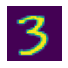

In [20]:
show_image(three_tensors[1]);

Now comes the part of computing the average of the values over each pixel position. 

To achieve this task, we'll stack all of the three_tensors on top of each other to create a cuboid. This stacked tensor is called a "Rank-3 Tensor". The image below will provide a very good idea of how a rank-3 tensor looks. 

A "rank" in a tensor is the number of axes or dimensions in a tensor. The "shape" is the size of the each axs of a tensor. 

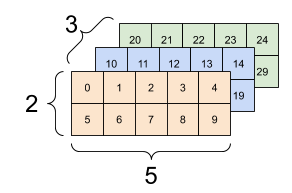

As we are using PyTorch, we'll have to convert the pixel values to float from integer. 
A basic rule of thumb to be followed while dealing with float values in images, is to convert the value between 0 and 1. 

In [21]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [22]:
stacked_threes.shape

torch.Size([6131, 28, 28])

From this shape we can see that all the tensors of threes are stacked on top of each other. There are 6131 images that are 28 pixels by 28 pixels wide in this rank-3 tensor. 

As was stated earlier, that a rank in a tensor is the number of dimensions of that tensor. We can verify the rank of the tensor with the help of "ndim". 

In [23]:
stacked_threes.ndim

3

In [24]:
mean3 = stacked_threes.mean(0)

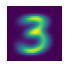

In [25]:
show_image(mean3)

The above image is the ideal 3 for the machine. Intuitively this makes sense. If we do average values over pixels, then a larger portion will be covered by the three. The portion covered will be blurry as it encompasses the values of a large amount of threes. 

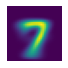

In [26]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

Now we have to measure how much difference is in between our average 3 and the 3s in the dataset. 

One way to see the difference between our 3 and the dataset threes is literally taking the difference between each pixel and then adding the differences. But we can't do that. The reason being that there will be some -ve and some +ve differences. While addition, these will cancel out. 

But why the addition of differences?
The main reason for seeing the distance of our 3 from those in the dataset is to see how good it represents all of the images in the dataset, so that a more accurate prediction about the newer data can be made. If we go on to see the difference between each pixel, we won't be able to see if our average image is any good. Hence, the additions of the differences. 

Now, if we can't simply subtract the differences, then what do we do?

There are two conventional metjods used for this purpose. One is the **Mean Absolute Difference** (a.k.a L1 Norm) and the second is **Root Mean Squared Error** (RMSE) (a.k.a L2 Norm). 

In L1 norm we tae the mean of the absolute value of the difference. 

Whereas in L2 norm we first sqaure the differences. Then we take their mean. Then we square root that mean. 

In the images below the word error can be replaced by the word difference. 

Below I am adding the formulae of MAD and RMSE. Some people have a tendency to understand these things with the help of the formulae with them.

**Mean Absolute Difference**

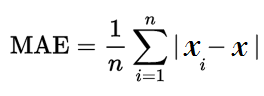

**Root Mean Squared Error (RMSE)**

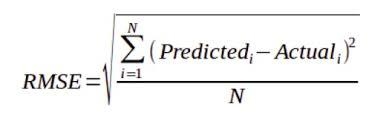

**An image to help understand L1 and L2 norm**

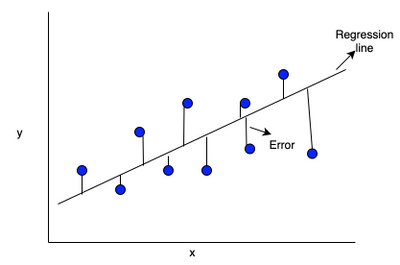

Calculating MAD and RMSE

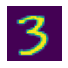

In [27]:
a_3 = stacked_threes[1]
show_image(a_3);

In [28]:
dist_3_abs = (a_3 - mean3).abs().mean() #MAD
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() #RMSE
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [29]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

Here, we can see that for both MAD and RMSE, the values are lesser for 3 than 7. This means less error. Hence, we can confirm of the image as a 3. This is the basic working of our model. We just now have to figure out a way to do this for all of the images in the valdation set at once so as to predict images. 

Also, we don't have to write the formulae for MAD and RMSE. PyTorch provides us with functions that help us calculate this. 

In [30]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Now, we will use the valid dataset to measure the performance of the model. Let's first create the tensors for 3s and 7s to manipulate that data. 

In [32]:
valid_3_tensor = torch.stack([tensor(Image.open(i)) for i in (path/"valid"/"3").ls()])
valid_3_tensor = valid_3_tensor.float()/255

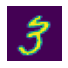

In [34]:
show_image(valid_3_tensor[1])

In [37]:
valid_7_tensor = torch.stack([tensor(Image.open(i)) for i in (path/"valid"/"7").ls()])
valid_7_tensor = valid_7_tensor.float()/255

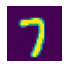

In [43]:
show_image(valid_7_tensor[0]);

In [45]:
valid_3_tensor.shape, valid_7_tensor.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [52]:
def mnist_dist(a,b):
  return (a-b).abs().mean((-1,-2))

The tuple (-1,-2) represents a range of axes. In Python, -1 refers to the last element, and -2 refers to the second-to-last. So in this case, this tells PyTorch that we want to take the mean ranging over the values indexed by the last two axes of the tensor. The last two axes are the horizontal and vertical dimensions of an image. After taking the mean over the last two axes, we are left with just the first tensor axis, which indexes over our images, which is why our final size was (1010). In other words, for every image, we averaged the intensity of all the pixels in that image.

In [53]:
mnist_dist(a_3, mean3)

tensor(0.1114)

In [54]:
valid_3_dist = mnist_dist(valid_3_tensor, mean3)

In [55]:
valid_3_dist.shape

torch.Size([1010])

In [56]:
valid_3_dist

tensor([0.1117, 0.1295, 0.1168,  ..., 0.1506, 0.1380, 0.1483])

What just happened? You might ask. So what PyTorch actually did is called broadcasting. 

PyTorch will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

After broadcasting so the two argument tensors have the same rank, PyTorch applies its usual logic for two tensors of the same rank: it performs the operation on each corresponding element of the two tensors, and returns the tensor result.

In [57]:
def is_3(x): 
  return (mnist_dist(x, mean3) < mnist_dist(x, mean7))

In [58]:
is_3(a_3)

tensor(True)

In [59]:
is_3(valid_3_tensor)

tensor([ True, False,  True,  ...,  True,  True,  True])

In [60]:
accuracy_3s = is_3(valid_3_tensor).float().mean()
accuracy_7s = (1 - is_3(valid_7_tensor).float()).mean()

In [61]:
accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

Both of our models are actually performing very well with this baseine model. But let's be honest, 3 and 7 can easily be identified and only 2 out of 10 are being compared here. But, this model works pretty well for only a baseline model.



---

